# Python Project - (Dataset Exploration Title)
## By Tobi Oloyede

## Introduction
> The Prosper loan dataset is a collection of data from the peer-to-peer lending platform Prosper, which contains information about loans, borrowers, and lenders. The dataset has 113,937 loans with 81 variables on each loan, such as loan amount, borrower rate, current loan status, borrower income, and others.





## Preliminary Wrangling


In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in csv file

In [2]:
# read in csv file
df = pd.read_csv('Prosper Loan.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> Structure of dataset
The Prosper loan dataset has a total of 113937 loan entries with 81 attributes on each loan, of which includes loan amount, borrower's state, borrower's occupation, borrower's income among many others.
Of these attributes there are two main categories of which ar;



### What is/are the main feature(s) of interest in your dataset?

> Performing an exploratory data analysis by getting any insights i can find. I'm interested in finding out;
 1. Which category of listing takes the most loans and for what purpose?
 2. Major reasons for taking loans
 3. Does wagerange affect loan intake;
 and any other insights i can get from this dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  LoanStatus, ListingCategory (numeric), BorrowerState, Occupation, Term, EmploymentStatus,   IsBorrowerHomeowner, CurrentlyInGroup, IncomeRange, LoanOriginalAmount, Recommendations,LoanOriginationDate, StatedMonthlyIncome

# Definition of the selected columns
> ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.

> ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.

> LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress,  PastDue. The PastDue status will be accompanied by a delinquency bucket.

> ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

> BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

> Occupation: The Occupation selected by the Borrower at the time they created the listing.

> EmploymentStatus: The employment status of the borrower at the time they posted the listing.

> IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

> CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.

> IncomeRange: The income range of the borrower at the time the listing was created.

> LoanOriginalAmount:The origination amount of the loan.

> LoanOriginationDate:The date the loan was originated.

> Recommendations: Number of recommendations the borrower had at the time the listing was created.

> Rank: The length of the loan expressed in months.

> StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

In [4]:
# select the columns relevant to my analysis
selected = [
    'ListingKey', 'ListingNumber', 'LoanStatus', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'Term',\
    'EmploymentStatus', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'IncomeRange', 'LoanOriginalAmount', 'Recommendations',\
    'LoanOriginationDate', 'StatedMonthlyIncome', 'BorrowerRate'
]

loan_df = df[selected]
loan_df.head()

,ListingKey,ListingNumber,LoanStatus,ListingCategory (numeric),BorrowerState,Occupation,Term,EmploymentStatus,IsBorrowerHomeowner,CurrentlyInGroup,IncomeRange,LoanOriginalAmount,Recommendations,LoanOriginationDate,StatedMonthlyIncome,BorrowerRate
0,1021339766868145413AB3B,193129,Completed,0,CO,Other,36,Self-employed,True,True,"$25,000-49,999",9425,0,12/09/2007 00:00,3083.333333,0.1580
1,10273602499503308B223C1,1209647,Current,2,CO,Professional,36,Employed,False,False,"$50,000-74,999",10000,0,03/03/2014 00:00,6125.000000,0.0920
2,0EE9337825851032864889A,81716,Completed,0,GA,Other,36,Not available,False,True,Not displayed,3001,0,17/01/2007 00:00,2083.333333,0.2750
3,0EF5356002482715299901A,658116,Current,16,GA,Skilled Labor,36,Employed,True,False,"$25,000-49,999",10000,0,01/11/2012 00:00,2875.000000,0.0974
4,0F023589499656230C5E3E2,909464,Current,2,MN,Executive,36,Employed,True,False,"$100,000+",15000,0,20/09/2013 00:00,9583.333333,0.2085


In [5]:
loan_df.dtypes

ListingKey                    object
ListingNumber                  int64
LoanStatus                    object
ListingCategory (numeric)      int64
BorrowerState                 object
Occupation                    object
Term                           int64
EmploymentStatus              object
IsBorrowerHomeowner             bool
CurrentlyInGroup                bool
IncomeRange                   object
LoanOriginalAmount             int64
Recommendations                int64
LoanOriginationDate           object
StatedMonthlyIncome          float64
BorrowerRate                 float64
dtype: object

In [6]:
# remove null rows
loan_df.dropna(inplace = True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13100\3886803373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df.dropna(inplace = True)


In [7]:
#drop duplicates
loan_df = loan_df.drop_duplicates()
loan_df.duplicated().sum()

0

# Note:
The category of the listing that the borrower selected when posting their listing according to the descriptio; 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [8]:
# assign these categories into a new variable
cat_var = {
    0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan', 5: 'Student Use',\
    6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12: 'Green Loans',\
    13: 'Household Expenses', 14: 'Large Purchases', 15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes',\
    19: 'Vacation', 20: 'Wedding Loans'
}
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].map(cat_var)


In [9]:
# convert Incomerange to categorical datatype
loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category')

# convert IsHomeOwner to categorical datatype
loan_df['IsBorrowerHomeowner'] = loan_df['IsBorrowerHomeowner'].astype('category')

In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105409 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingKey                 105409 non-null  object  
 1   ListingNumber              105409 non-null  int64   
 2   LoanStatus                 105409 non-null  object  
 3   ListingCategory (numeric)  105409 non-null  object  
 4   BorrowerState              105409 non-null  object  
 5   Occupation                 105409 non-null  object  
 6   Term                       105409 non-null  int64   
 7   EmploymentStatus           105409 non-null  object  
 8   IsBorrowerHomeowner        105409 non-null  category
 9   CurrentlyInGroup           105409 non-null  bool    
 10  IncomeRange                105409 non-null  category
 11  LoanOriginalAmount         105409 non-null  int64   
 12  Recommendations            105409 non-null  int64   
 13  LoanOriginatio

In [11]:
# convert to datetime
loan_df['LoanOriginationDate'] = loan_df['LoanOriginationDate'].astype('datetime64[ns]')

# Create new columns for year and month
loan_df['OriginationYear'] = loan_df['LoanOriginationDate'].dt.year
loan_df['OriginationMonth'] = loan_df['LoanOriginationDate'].dt.month_name()

In [12]:
# Standardize past due loans
loan_df['LoanStatus'] = loan_df['LoanStatus'].replace({
    'Past Due (1-15 days)': 'Past Due',
    'Past Due (16-30 days)': 'Past Due',
    'Past Due (31-60 days)': 'Past Due',
    'Past Due (61-90 days)': 'Past Due',
    'Past Due (91-120 days)': 'Past Due',
    'Past Due (>120 days)': 'Past Due'
})

loan_df.LoanStatus.value_counts()

Current                   54484
Completed                 33755
Chargedoff                10833
Defaulted                  4091
Past Due                   2044
FinalPaymentInProgress      201
Cancelled                     1
Name: LoanStatus, dtype: int64

## Univariate Exploration

> In this section, i will investigate distributions of some variables of interest..




# Proportion of loan across loanstatus

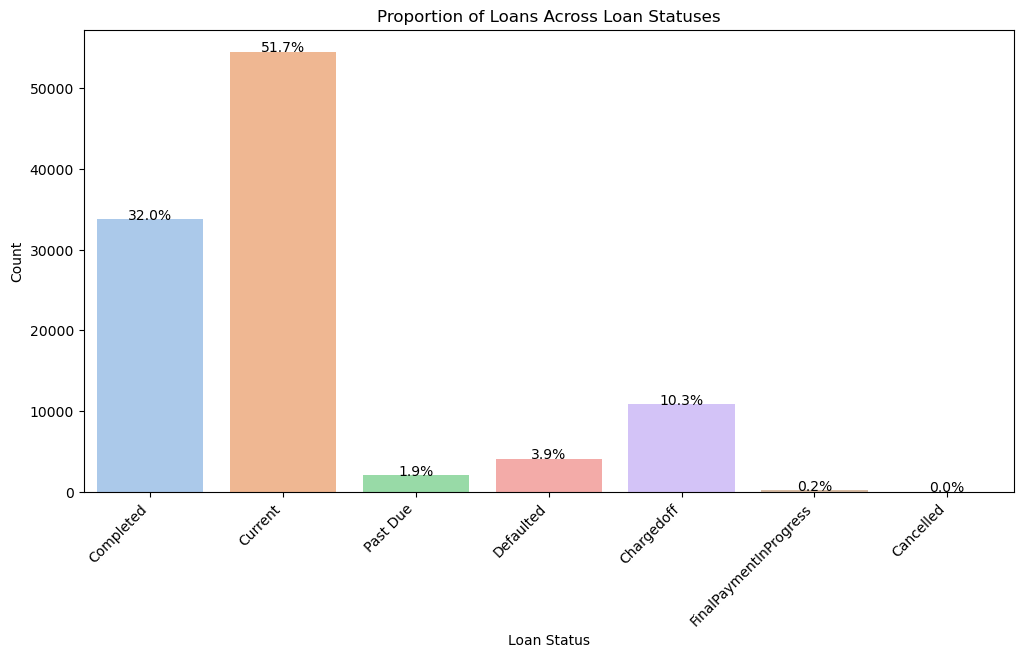

In [13]:
# Plotting a bar chart with data values in percentage
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='LoanStatus', data=loan_df, palette='pastel')

# Annotate each bar with percentage values
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(loan_df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Proportion of Loans Across Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

> This chart shows that majority of prosper loan borrowers are currently paying up theeir loan or have completed paying up their loan.
> 15% of the loans are either charged off, defaulted or past due

# Employment Status

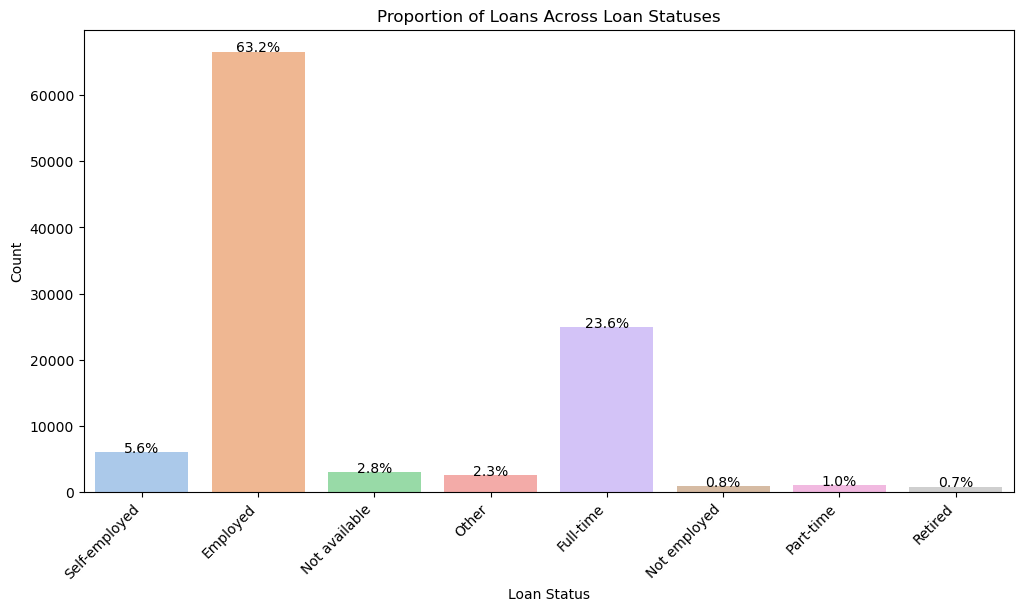

In [14]:
# Plotting a bar chart with data values in percentage
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='EmploymentStatus', data=loan_df, palette='pastel')

# Annotate each bar with percentage values
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(loan_df))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Proportion of Loans Across Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

> Majority of the people that come to borrow from Prosper loan are not unemployed, to show that slightly over 90% of the borrowers are employed fulltime or independent(self employed). This supports the fact that it will be difficult to get a loan if you are unemployed

# Occupation

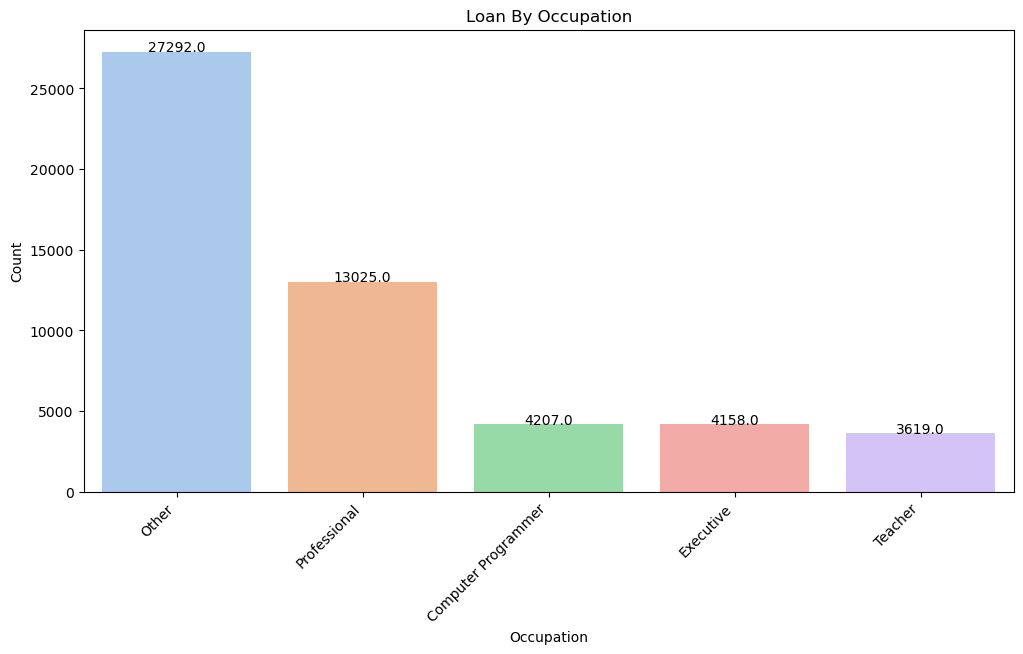

In [15]:
top_occupations = loan_df['Occupation'].value_counts().nlargest(5)

# Plotting a bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_occupations.index, y=top_occupations.values, palette='pastel')

# Annotate each bar with count values
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01
    ax.annotate(count, (x, y), ha='center')

plt.title('Loan By Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Listing Categories

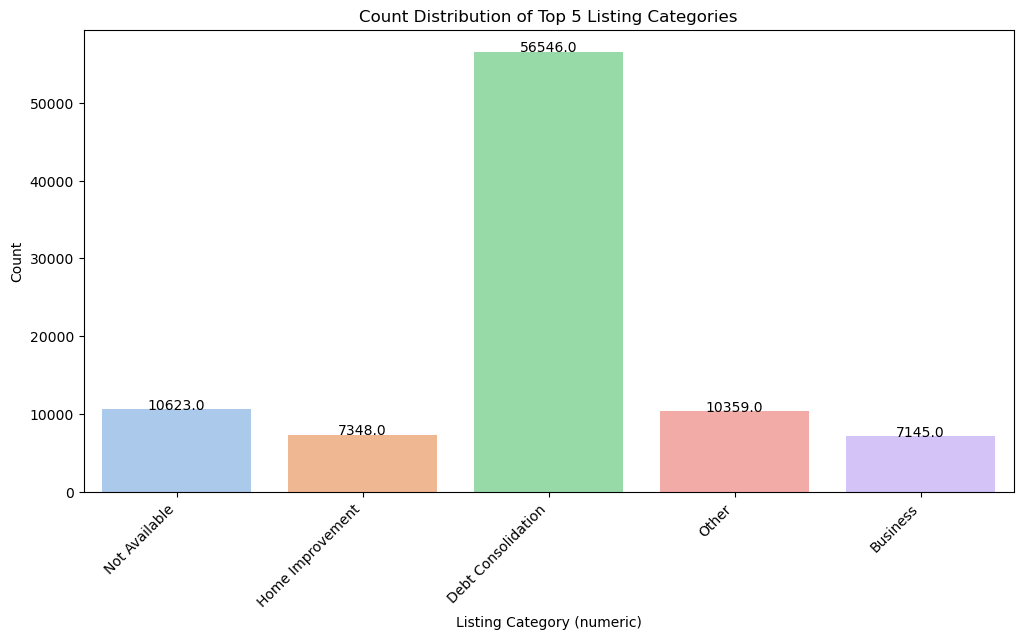

In [16]:
top_listing_categories = loan_df['ListingCategory (numeric)'].value_counts().nlargest(5)

# Filter the DataFrame to include only the top 5 listing categories
filtered_loan_df = loan_df[loan_df['ListingCategory (numeric)'].isin(top_listing_categories.index)]

# Plotting a bar chart
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='ListingCategory (numeric)', data=filtered_loan_df, palette='pastel')

# Annotate each bar with count values
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01
    ax.annotate(count, (x, y), ha='center')

plt.title('Count Distribution of Top 5 Listing Categories')
plt.xlabel('Listing Category (numeric)')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

> Settling of debt has been a huge driving force as to why people seek out loan

# Term of loan

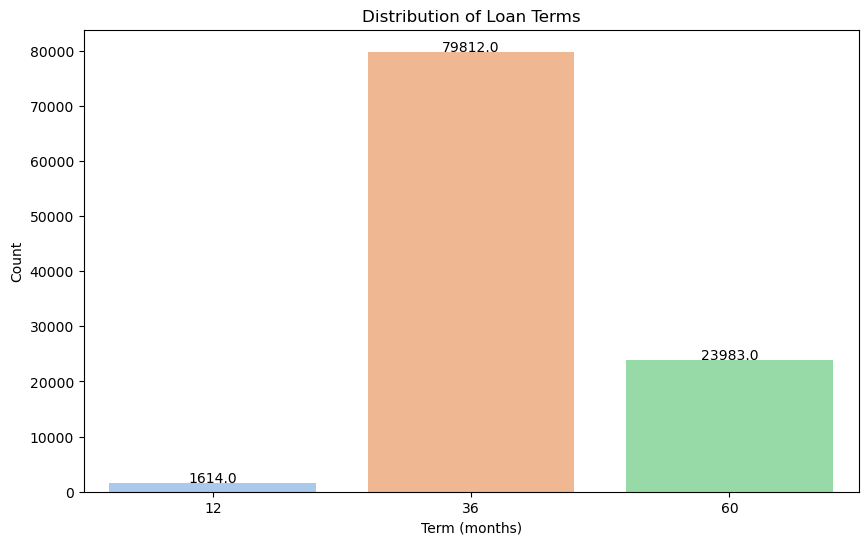

In [17]:
# Plotting a bar chart for loan terms
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Term', data=loan_df, palette='pastel')

# Annotate each bar with count values
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.01
    ax.annotate(count, (x, y), ha='center')

plt.title('Distribution of Loan Terms')
plt.xlabel('Term (months)')
plt.ylabel('Count')
plt.show()

> Out of the 3 prosper loan Term packages the 3years plan is the most selected loan term

# Wealth segment

In [18]:
loan_df['StatedMonthlyIncome'].median()

4750.0

In [19]:
loan_df['StatedMonthlyIncome'].describe()

count    1.054090e+05
mean     5.677226e+03
std      7.674369e+03
min      0.000000e+00
25%      3.303583e+03
50%      4.750000e+03
75%      6.916667e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [29]:
# define a classification function
def classify(row):
    if row["StatedMonthlyIncome"]<3300:
        return 'Low'
    if row["StatedMonthlyIncome"]<6916:
        return 'Middle'
    else:
        return 'High'
    
loan_df['WageGroup'] = loan_df.apply(classify, axis=1)
loan_df['WageGroup']

0            Low
1         Middle
2            Low
3            Low
4           High
           ...  
113932    Middle
113933      High
113934       Low
113935    Middle
113936    Middle
Name: WageGroup, Length: 105409, dtype: object

In [30]:
#convert to categorical datatype
loan_df['WageGroup'] = loan_df['WageGroup'].astype('category')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105409 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 105409 non-null  object        
 1   ListingNumber              105409 non-null  int64         
 2   LoanStatus                 105409 non-null  object        
 3   ListingCategory (numeric)  105409 non-null  object        
 4   BorrowerState              105409 non-null  object        
 5   Occupation                 105409 non-null  object        
 6   Term                       105409 non-null  int64         
 7   EmploymentStatus           105409 non-null  object        
 8   IsBorrowerHomeowner        105409 non-null  category      
 9   CurrentlyInGroup           105409 non-null  bool          
 10  IncomeRange                105409 non-null  category      
 11  LoanOriginalAmount         105409 non-null  int64   

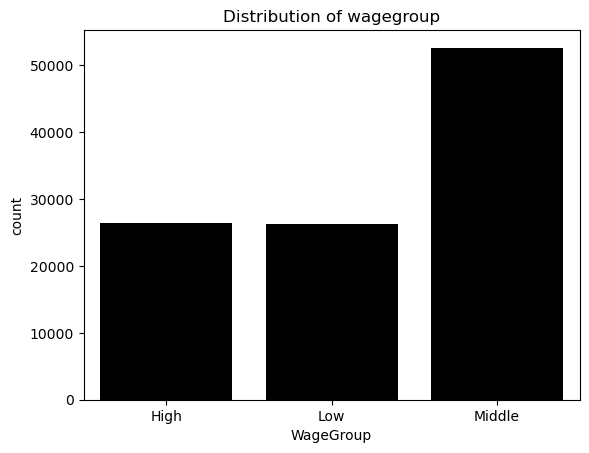

In [31]:
sns.countplot(data=loan_df, x='WageGroup', color='black')
plt.title('Distribution of wagegroup');

The most significant group of borrowers in Prosper loans consists of individuals falling within the middle-income category, where the average salary ranges between 3300 and 6900. 

# Locations

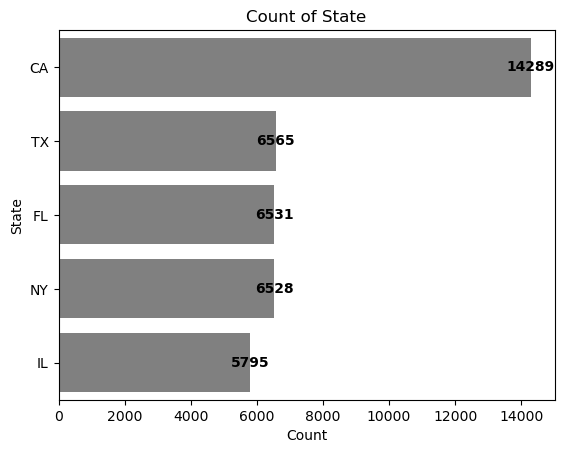

In [23]:
sns.countplot(data=loan_df, y='BorrowerState', color='grey', order=loan_df['BorrowerState'].value_counts().nlargest(5).index)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Count of State')
for index, value in enumerate(loan_df['BorrowerState'].value_counts().nlargest(5).sort_values(ascending=False)):
    plt.text(value, index, str(value), ha='center', va='center', fontweight='bold')

California, Texas, Florida, New York, and Illinois emerge as the states with the highest number of borrowers

 # Loan Trend across years

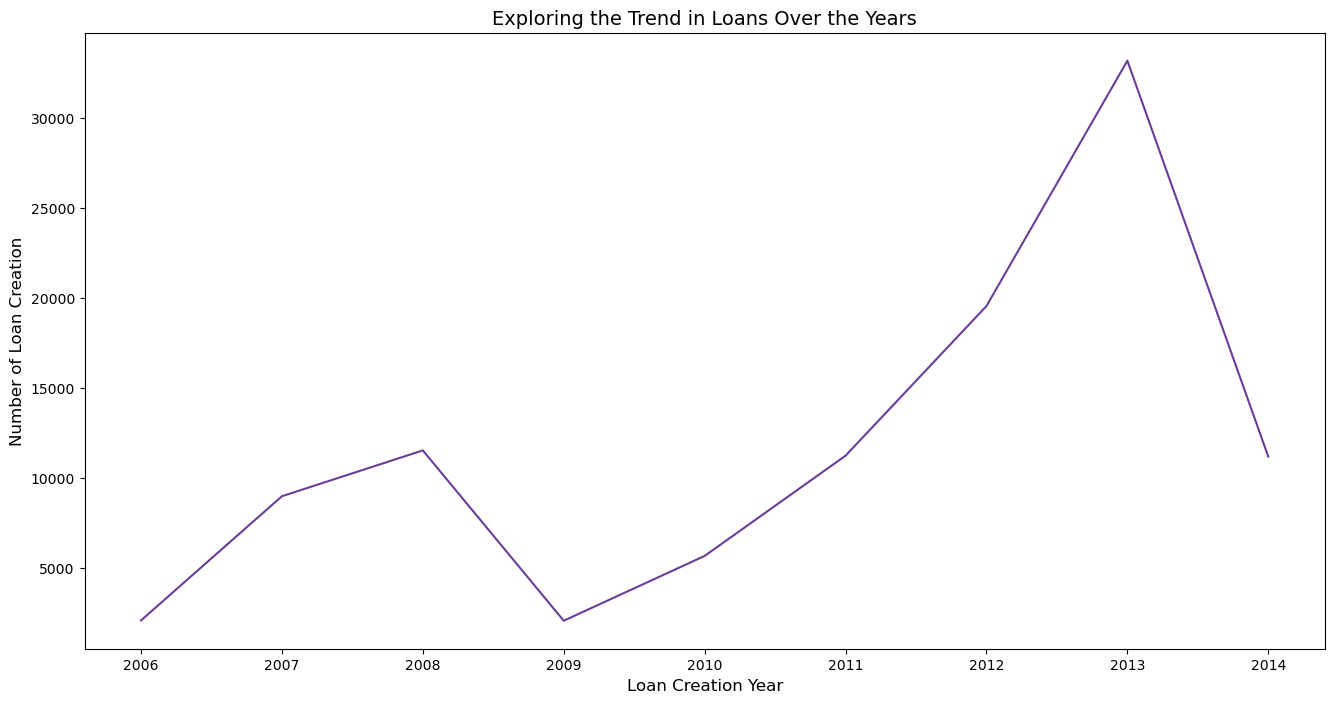

In [24]:
year_grouped = loan_df['OriginationYear'].value_counts().sort_index()
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.lineplot(x = year_grouped.index, y = year_grouped, color = base_color)
plt.xlabel('Loan Creation Year', fontsize = 12)
plt.ylabel('Number of Loan Creation', fontsize = 12)
plt.title('Exploring the Trend in Loans Over the Years', fontsize = 14)
plt.show()

The number of borrowers experienced a substantial increase from 2009, reaching its peak in 2013, followed by a significant decline.

## Bivariate Exploration


In [27]:
#Borrower rate by year


C:\Users\DELL\AppData\Local\Temp\ipykernel_13100\2367155812.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=loan_df, x='OriginationYear', y='BorrowerRate', ci=None);


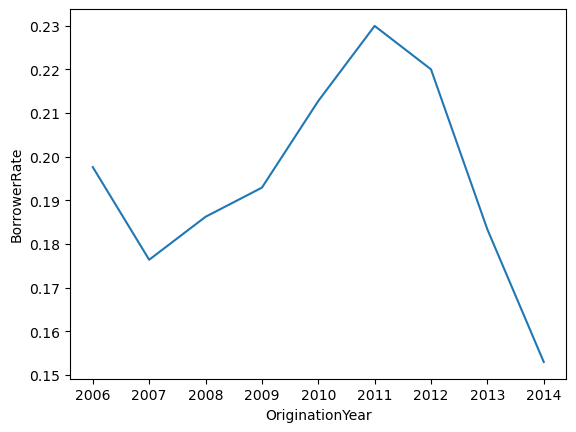

In [28]:
sns.lineplot(data=loan_df, x='OriginationYear', y='BorrowerRate', ci=None);

This chart shows that borrower's rate spiked from 2007 - 2011 before experiencing a significant downfall

## Observations

> Among the various reasons for seeking loans, a notable portion of borrowers often use the funds to manage outstanding debts

> The majority of borrowers appear to prefer the 36-month (3-year) loan term over the 12-month term

> The year 2013 appears to have witnessed the peak influx of loans in the company's history

> Prosper Loan maintains a robust loan status, with the majority of loans either in the process of being repaid or fully settled. This constitutes 80% of their loan portfolio

> California, Texas, Florida, New York, and Illinois stand out as the states with the greatest number of borrowers.

> In recent years, the borrower's rate at Prosper Loan has experienced a significant decrease from its peak in 2011.